In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os

2024-06-23 17:58:24.915720: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 17:58:24.915839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 17:58:25.008926: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
base_path = '/kaggle/input/character-images'

In [3]:
# Load the CSV files
train_df = pd.read_csv(os.path.join(base_path, 'emnist-byclass-train.csv'), header=None)
test_df = pd.read_csv(os.path.join(base_path, 'emnist-byclass-test.csv'), header=None)

# Separate features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Reshape and normalize the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(62, activation='softmax')  # 62 classes: 10 digits + 52 letters
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=30,
                    validation_split=0.1)

Epoch 1/30


2024-06-23 17:59:56.953831: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-06-23 17:59:56.953887: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-06-23 17:59:56.953897: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-06-23 17:59:56.953905: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-06-23 17:59:56.953913: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-06-23 17:59:56.953921: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-06-23 17:59:56.953929: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-06-23 17:59:56.953937: E external/local_xla/xla/se

   62/19630 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.0361 - loss: 4.7021

I0000 00:00:1719165599.995535      66 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19630/19630 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.6471 - loss: 1.3001 - val_accuracy: 0.8296 - val_loss: 0.4902
Epoch 2/30
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8132 - loss: 0.5553 - val_accuracy: 0.8413 - val_loss: 0.4477
Epoch 3/30
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8304 - loss: 0.4960 - val_accuracy: 0.8480 - val_loss: 0.4275
Epoch 4/30
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.8368 - loss: 0.4682 - val_accuracy: 0.8499 - val_loss: 0.4170
Epoch 5/30
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.8421 - loss: 0.4503 - val_accuracy: 0.8524 - val_loss: 0.4132
Epoch 6/30
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.8449 - loss: 0.4393 - val_accuracy: 0.8533 - val_loss: 0.4079
Epoch 7/30
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.8479 - loss: 0.4283 - val_accuracy: 0.8541 - val_loss: 0.4047
Epoch 8/30
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8491 - lo

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8576 - loss: 0.4014
Test accuracy: 0.8577151298522949


In [7]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [8]:
sample_index = 4382
predicted_label = np.argmax(y_predicted[sample_index])
actual_label = y_test[sample_index]

In [9]:
actual_label

1

In [10]:
predicted_label

1

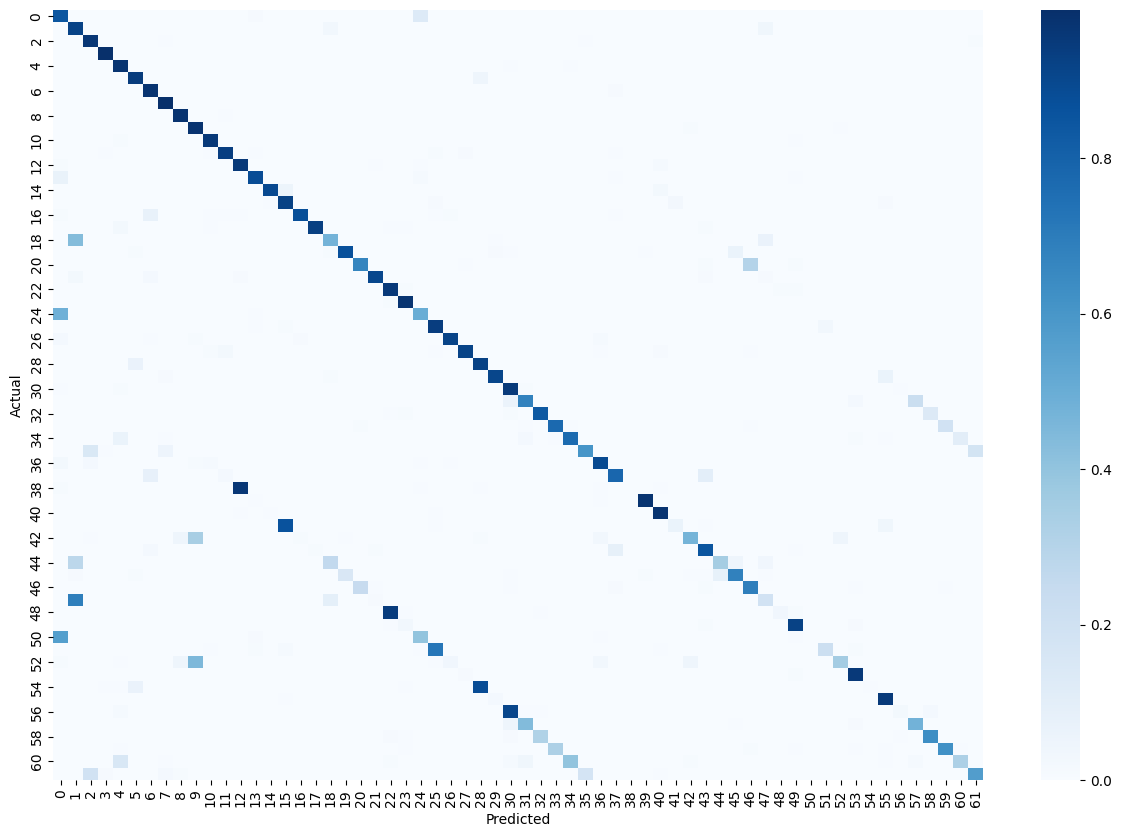

In [11]:
cm_normalized = cm.numpy() / cm.numpy().sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15, 10))
sn.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()